# Conceptual Test

purpose: classify PSK and GFSK signals

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from lib import sig_gen

Loading BokehJS ...

In [2]:
symb, sps = 10, 10
mi, bt = 0.5, 0.3
msg = np.array([1,0,1,0,1,0,1,1, 1, 1])
phase = sig_gen.gfsk_mod(msg, sps, bt, mi)

sig = np.exp(1j*phase)
fq = np.diff(np.unwrap(np.angle(sig))) 
fig2 = figure(plot_width=600, plot_height=300)
fig2.line(np.arange(fq.size), fq)
show(fig2)

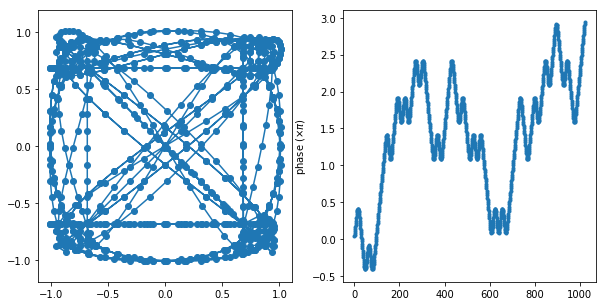

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sig = sig_gen.psk_gen()
ax[0].plot(sig.imag, sig.real, marker='o')
ax[0].axis('equal')

sig = sig_gen.gfsk_gen()
phase = np.unwrap(np.angle(sig))
ax[1].plot(phase/np.pi, marker='.')
plt.ylabel('phase ('r'$\times \pi$)')
plt.show()   

In [37]:
%timeit np.array([sig_gen.gfsk_gen() for x in range(10)])

4.59 ms ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
sig2 = np.vstack((sig, sig, sig))
sig2 = np.expand_dims(sig2, 1)[:, :, 0:-1: 4]

# sig2 = np.matlib.repmat(sig, 3, 1)
sig2.shape


(3, 1, 256)